In [63]:
import numpy as np 
import pandas as pd
import os
from pandas import read_csv
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
data.shape

(506, 14)

In [37]:
# Modified dataNorm() function from Practicum 1
# Normalisation of the input features to ensure that they are on a common scale. 
# This is to prevent any unequal contributions of certain higher scaled features to the model which may result
# in inaccuracy and bias.
def dataNorm(X): 
    # Normalise data points
    length = len(X.columns)
    for i in range(0, length-1): 
        col = X.iloc[:,i]
        max_val = col.max() 
        min_val = col.min() 
        X.iloc[:,i] = (col-min_val)/(max_val-min_val)
    return X

In [38]:
data_norm = dataNorm(data)
data_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [185]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data_norm, target = 'MEDV', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

In [186]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
434,0.156312,0.0,0.646628,0.0,0.674897,0.507185,0.948507,0.099355,1.000000,0.914122,0.808511,0.252938,0.370861
75,0.000998,0.0,0.453446,0.0,0.106996,0.522131,0.433574,0.306723,0.173913,0.402672,0.648936,0.965530,0.198951
236,0.005780,0.0,0.210411,1.0,0.251029,0.588235,0.757981,0.274477,0.304348,0.229008,0.510638,0.978693,0.215508
97,0.001287,0.0,0.089076,0.0,0.123457,0.863767,0.752832,0.215115,0.043478,0.169847,0.574468,1.000000,0.068433
111,0.001062,0.0,0.350073,0.0,0.333333,0.604330,0.810505,0.140758,0.217391,0.467557,0.553191,0.996697,0.232616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.071786,0.0,0.646628,0.0,0.409465,0.498371,0.973223,0.097882,1.000000,0.914122,0.808511,0.762620,0.617274
102,0.002500,0.0,0.296921,0.0,0.277778,0.544932,0.849640,0.144141,0.173913,0.375954,0.882979,0.177720,0.245585
89,0.000525,0.0,0.108138,0.0,0.213992,0.674075,0.619979,0.207777,0.043478,0.158397,0.553191,0.997882,0.109547
300,0.000425,0.7,0.065249,0.0,0.030864,0.634221,0.458290,0.609099,0.173913,0.326336,0.234043,0.984770,0.119757


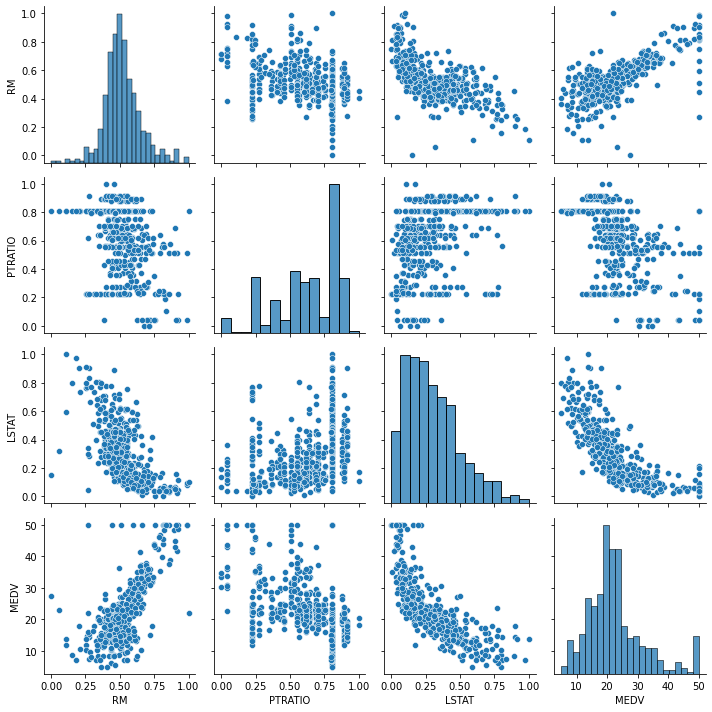

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df= data.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','AGE', 'DIS', 'RAD', 'TAX','B'], axis = 1)
# Calculate and show pairplot
sns.pairplot(df,size=2.5)
plt.tight_layout()

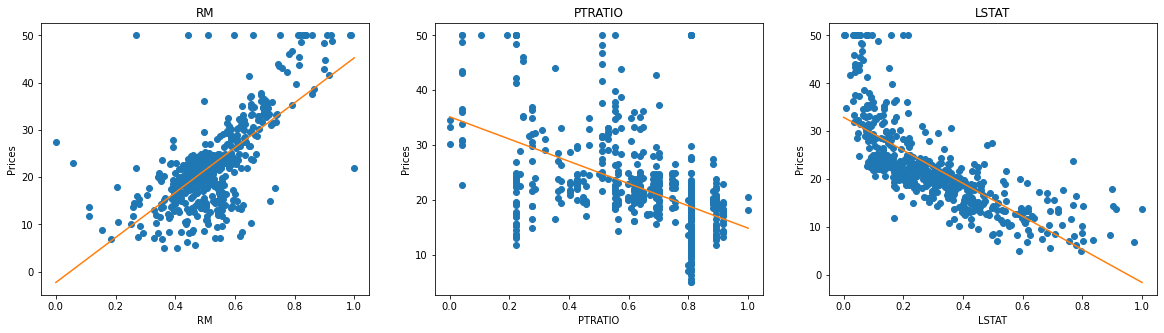

In [188]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
df2= data.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','AGE', 'DIS', 'RAD', 'TAX','B','MEDV'], axis = 1)
i=1
for i, col in enumerate(df2.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1,3,i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

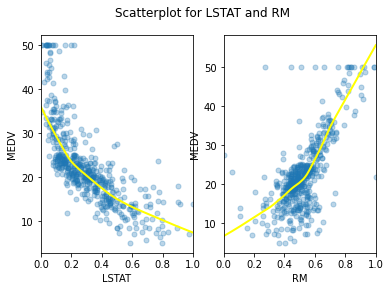

In [189]:
fig, axes = plt.subplots(1,2)
fig.suptitle("Scatterplot for LSTAT and RM")

sns.regplot(x=data_norm['LSTAT'], y=data_norm['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'yellow', 'linewidth': 2}, ax=axes[0])
sns.regplot(x=data_norm['RM'], y=data_norm['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'yellow', 'linewidth': 2}, ax=axes[1])


[Text(0.5, 1.0, 'Correlation Matrix')]

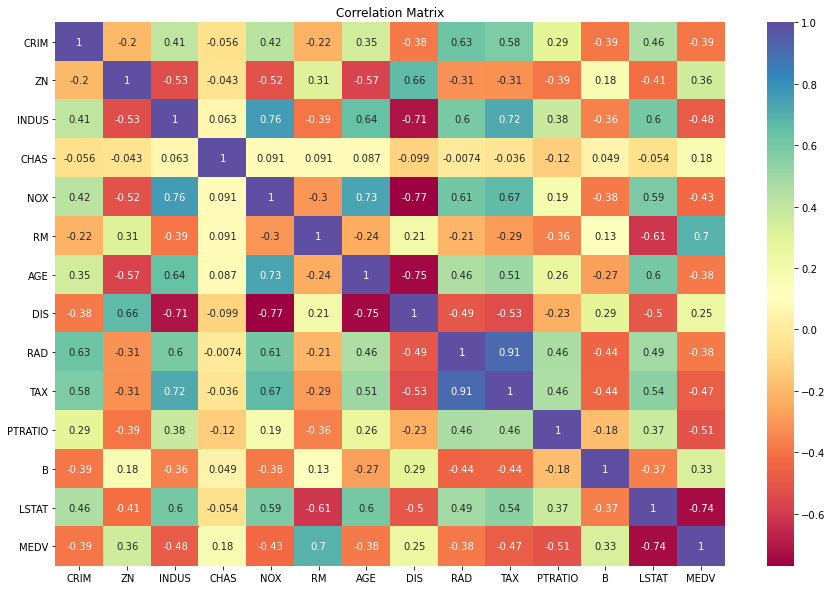

In [190]:
corr = data_norm.corr() 
plt.figure(figsize=(15,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

# Hypothesis Degree 1

In [351]:
#Training and Cross Validation hyp degree *1*
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
import numpy as np
from sklearn.linear_model import LinearRegression

#  Trained Model With 3 features with polynomail degree *1*
X = X_train[['RM','PTRATIO','LSTAT']]

# Linear Regression Model
y = y_train
reg = LinearRegression().fit(X, y)

# Regularization Ridge Model
ridge_model_1 = make_pipeline(PolynomialFeatures(degree=1),Ridge(alpha=1))

# model evaluation for training set
y_train_predict = reg.predict(X_train[['RM','PTRATIO','LSTAT']])
# model evaluation for valdation set
y_valid_predict = reg.predict(X_valid[['RM','PTRATIO','LSTAT']])
# model evaluation for testing set
y_test_predict = reg.predict(X_test[['RM','PTRATIO','LSTAT']])

# calculating the intercept and slope for the regression line
b, m = np.polynomial.polynomial.polyfit(y_train, y_train_predict, 1)

# Cross Validation
kf=KFold(n_splits=5)
score=cross_val_score(reg,X,y,cv=kf)
score11 = cross_val_score(reg,X_test[['RM','PTRATIO','LSTAT']],y_test,cv=kf)

score_ridge1 = cross_val_score(ridge_model_1,X,y,cv=kf)
score_ridge11 = cross_val_score(ridge_model_1,X_test[['RM','PTRATIO','LSTAT']],y_test,cv=kf)

print("Cross Validation Scores for train are {}".format(score))
print("Cross Validation Scores for test are {}".format(score11))
print("Cross Validation Scores for ridge train are {}".format(score_ridge1))
print("Cross Validation Scores for ridge test are {}".format(score_ridge11))
print("Average Cross Validation score for training set :{}".format(score.mean()))
print("Average Cross validation score for test set :{}".format(score11.mean()))

# Regularization train and test scores
print("Average Cross validation score for ridge(train) set :{}".format(score_ridge1.mean()))
print("Average Cross validation score for ridge(test) set :{}".format(score_ridge11.mean()))

Cross Validation Scores for train are [0.745199   0.61937164 0.64908621 0.56556101 0.70399642]
Cross Validation Scores for test are [ 0.44531127  0.76735301 -0.04220347  0.14031428  0.71879087]
Cross Validation Scores for ridge train are [0.74154334 0.62774074 0.65212541 0.56160997 0.69582181]
Cross Validation Scores for ridge test are [0.59401097 0.6159803  0.43132496 0.3607877  0.50713832]
Average Cross Validation score for training set :0.6566428582600153
Average Cross validation score for test set :0.4059131941714883
Average Cross validation score for ridge(train) set :0.6557682529568568
Average Cross validation score for ridge(test) set :0.5018484519191542


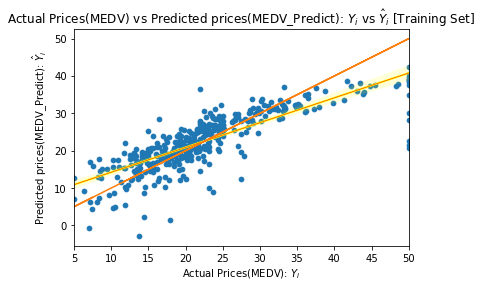

In [281]:
sns.scatterplot(y_train, y_train_predict, alpha=0.4)
sns.regplot(y_train, y_train_predict, truncate=True, scatter_kws={'s': 20, 'alpha':1}, line_kws={'color':'yellow', 'linewidth': 2})
sns.lineplot(np.unique(y_train), np.unique(np.poly1d(b + m * np.unique(y_train))), linewidth=0.5, color='r')

# Y_predit equal Y_test
plt.plot(y_train,y_train)
plt.xlabel("Actual Prices(MEDV): $Y_i$")
plt.ylabel("Predicted prices(MEDV_Predict): $\hat{Y}_i$")
plt.title("Actual Prices(MEDV) vs Predicted prices(MEDV_Predict): $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

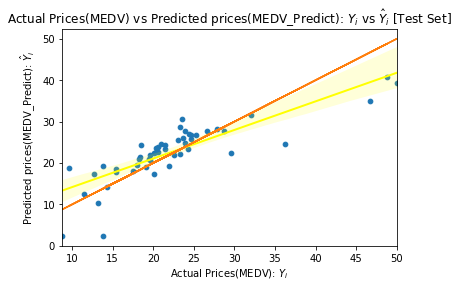

In [217]:
sns.scatterplot(y_test, y_test_predict, alpha=0.4)
sns.regplot(y_test, y_test_predict, truncate=True, scatter_kws={'s': 20, 'alpha':1}, line_kws={'color':'yellow', 'linewidth': 2})

plt.plot(y_test,y_test)
plt.xlabel("Actual Prices(MEDV): $Y_i$")
plt.ylabel("Predicted prices(MEDV_Predict): $\hat{Y}_i$")
plt.title("Actual Prices(MEDV) vs Predicted prices(MEDV_Predict): $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

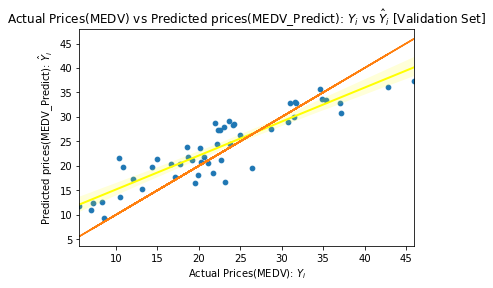

In [233]:
sns.scatterplot(y_valid, y_valid_predict, alpha=0.4)
sns.regplot(y_valid, y_valid_predict, truncate=True, scatter_kws={'s': 20, 'alpha':1}, line_kws={'color':'yellow', 'linewidth': 2})


# Y_predit equal Y_test
plt.plot(y_valid,y_valid)
plt.xlabel("Actual Prices(MEDV): $Y_i$")
plt.ylabel("Predicted prices(MEDV_Predict): $\hat{Y}_i$")
plt.title("Actual Prices(MEDV) vs Predicted prices(MEDV_Predict): $Y_i$ vs $\hat{Y}_i$ [Validation Set]")
 
plt.show()

In [322]:
# Root Mean Square Error for training set
mse = mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
 
print("The linear model performance for training set")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))

The linear model performance for training set
RMSE is 5.370451824451364
MSE is 28.84175279875298


In [321]:
# Root Mean Square Error for test set
mse = mean_squared_error(y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
 
print("\nThe linear model performance for testing set")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))


The linear model performance for testing set
RMSE is 4.6665485242194995
MSE is 21.776675128895185


In [320]:
# Root Mean Square Error for validation set
mse = mean_squared_error(y_valid, y_valid_predict)
rmse = (np.sqrt(mean_squared_error(y_valid, y_valid_predict)))

print("\nThe linear model performance for validation set")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))


The linear model performance for validation set
RMSE is 4.416995585828298
MSE is 19.50985000522667


# Hypothesis Degree 2

In [352]:
#Training and Cross Validation hypothesis degree *2*
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Trained Model With 3 features with polynomail degree *2*
X=X_train[['RM','PTRATIO','LSTAT']]
X2= X_test[['RM','PTRATIO','LSTAT']]

poly2 = PolynomialFeatures(2)
X_train_poly =poly2.fit_transform(X)
X_test_poly = poly2.fit_transform(X2)

#Linear Regression Model
y = y_train
reg2= LinearRegression().fit(X_train_poly , y)

# Regularization Ridge Model
ridge_model_2 = make_pipeline(poly2,Ridge(alpha=1))

# model evaluation for training set
y_train_predicted = reg2.predict(X_train_poly)

# model evaluation for training set
y_valid_predicted = reg2.predict(poly2.fit_transform(X_valid[['RM','PTRATIO','LSTAT']]))

# model evaluation for test set
y_test_predicted = reg2.predict(X_test_poly)


# Cross Validation
kf=KFold(n_splits=5)
score=cross_val_score(reg2,X_train_poly ,y,cv=kf)
score12 = cross_val_score(reg2,X_test_poly,y_test,cv=kf)

score_ridge2 = cross_val_score(ridge_model_2,X_train_poly,y,cv=kf)
score_ridge12 = cross_val_score(ridge_model_2,X_test_poly,y_test,cv=kf)

print("Cross Validation Scores for train are {}".format(score))
print("Cross Validation Scores for test are {}".format(score12))
print("Cross Validation Scores for ridge train are {}".format(score_ridge2))
print("Cross Validation Scores for ridge test are {}".format(score_ridge12))
print("Average Cross Validation score for training set :{}".format(score.mean()))
print("Average Cross validation score for test set :{}".format(score12.mean()))

# Regularization train and test scores
print("Average Cross validation score for ridge(train) set :{}".format(score_ridge2.mean()))
print("Average Cross validation score for ridge(test) set :{}".format(score_ridge12.mean()))

Cross Validation Scores for train are [0.83259178 0.78282226 0.75141999 0.68483547 0.77125954]
Cross Validation Scores for test are [ 0.40204023  0.61577752 -0.62069718 -0.09623953  0.77822102]
Cross Validation Scores for ridge train are [0.83594513 0.77913745 0.75174453 0.64961619 0.82988945]
Cross Validation Scores for ridge test are [0.6303962  0.80292113 0.46618898 0.15135381 0.74450823]
Average Cross Validation score for training set :0.7645858077456704
Average Cross validation score for test set :0.21582041164284008
Average Cross validation score for ridge(train) set :0.7692665507746802
Average Cross validation score for ridge(test) set :0.5590736698398889


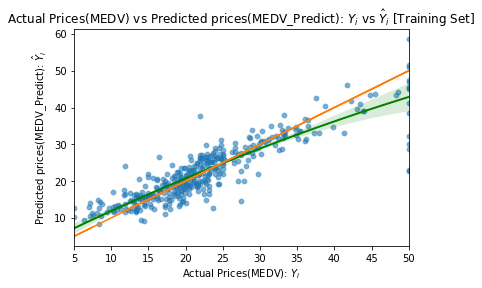

In [227]:
sns.scatterplot(y_train, y_train_predicted, alpha=0.4)
sns.regplot(y_train, y_train_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)

plt.plot(y_train,y_train)
plt.xlabel("Actual Prices(MEDV): $Y_i$")
plt.ylabel("Predicted prices(MEDV_Predict): $\hat{Y}_i$")
plt.title("Actual Prices(MEDV) vs Predicted prices(MEDV_Predict): $Y_i$ vs $\hat{Y}_i$ [Training Set]")

plt.show()

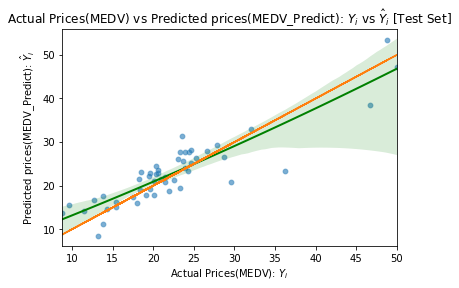

In [198]:
sns.scatterplot(y_test, y_test_predicted, alpha=0.4)
sns.regplot(y_test, y_test_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)

plt.plot(y_test,y_test)
plt.xlabel("Actual Prices(MEDV): $Y_i$")
plt.ylabel("Predicted prices(MEDV_Predict): $\hat{Y}_i$")
plt.title("Actual Prices(MEDV) vs Predicted prices(MEDV_Predict): $Y_i$ vs $\hat{Y}_i$ [Test Set]")

plt.show()

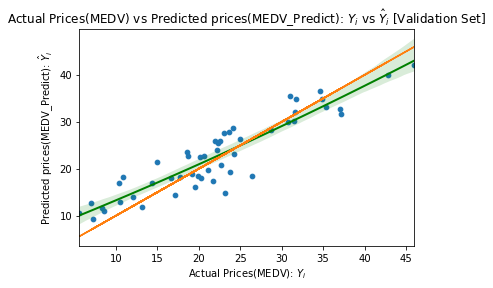

In [234]:
sns.scatterplot(y_valid, y_valid_predicted, alpha=0.4)
sns.regplot(y_valid, y_valid_predicted, truncate=True, scatter_kws={'s': 20, 'alpha':1}, line_kws={'color':'green', 'linewidth': 2},order=2)


plt.plot(y_valid,y_valid)
plt.xlabel("Actual Prices(MEDV): $Y_i$")
plt.ylabel("Predicted prices(MEDV_Predict): $\hat{Y}_i$")
plt.title("Actual Prices(MEDV) vs Predicted prices(MEDV_Predict): $Y_i$ vs $\hat{Y}_i$ [Validation Set]")
 
plt.show()

In [317]:
# Root Mean Square Error for training set
mse = mean_squared_error(y_train, y_train_predicted)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predicted)))
 
print("The linear model performance for training set")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))

The linear model performance for training set
RMSE is 4.2454493175048515
MSE is 18.02383990750241


In [318]:
# Root Mean Square Error for test set
mse = mean_squared_error(y_test, y_test_predicted)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predicted)))

print("\nThe linear model performance for testing set")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))


The linear model performance for testing set
RMSE is 3.7947700455172635
MSE is 14.400279698355094


In [319]:
# Root Mean Square Error for validation set
mse = mean_squared_error(y_valid, y_valid_predicted)
rmse = (np.sqrt(mean_squared_error(y_valid, y_valid_predicted)))

print("\nThe linear model performance for validation set")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))


The linear model performance for validation set
RMSE is 3.7223414069464114
MSE is 13.85582554986779


# Hypothesis Degree 3

In [362]:
#Training and Cross Validation hypothesis degree *3*
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Trained Model With 3 features with polynomail degree *3*
X=X_train[['RM','PTRATIO','LSTAT']]
X3 = X_test[['RM','PTRATIO','LSTAT']]

poly3 = PolynomialFeatures(3)
X_train_poly3=poly3.fit_transform(X)
X_test_poly3 = poly3.fit_transform(X3)

#Linear Regression Model
y = y_train
reg3 = LinearRegression().fit(X_train_poly3, y)

# Regulaization Ridge Model
ridge_model_3 = make_pipeline(poly3,Ridge(alpha=1))

# model evaluation for training set
y_train_predictedd = reg3.predict(X_train_poly3)

# model evaluation for test set
y_valid_predictedd = reg3.predict(poly3.fit_transform(X_valid[['RM','PTRATIO','LSTAT']]))

# model evaluation for test set
y_test_predictedd = reg3.predict(X_test_poly3)
 
# Cross Validation
kf=KFold(n_splits=5)
score=cross_val_score(reg3,X_train_poly3,y,cv=kf)
score13 = cross_val_score(reg3,X_test_poly3,y_test,cv=kf)

score_ridge3 = cross_val_score(ridge_model_3,X_train_poly3,y,cv=kf)
score_ridge13 = cross_val_score(ridge_model_3,X_test_poly3,y_test,cv=kf)

print("Cross Validation Scores for train are {}".format(score))
print("Cross Validation Scores for test are {}".format(score13))
print("Cross Validation Scores for ridge train are {}".format(score_ridge3))
print("Cross Validation Scores for ridge test are {}".format(score_ridge13))
print("Average Cross Validation score for training set :{}".format(score.mean()))
print("Average Cross validation score for test set :{}".format(score13.mean()))

# Regularization train and test scores
print("Average Cross validation score for ridge(train) set :{}".format(score_ridge3.mean()))
print("Average Cross validation score for ridge(test) set :{}".format(score_ridge13.mean()))

Cross Validation Scores for train are [0.83878493 0.55998905 0.73200166 0.66403304 0.75828608]
Cross Validation Scores for test are [-5.15343667e+00 -2.06056621e+00 -2.19436285e-01 -4.02027754e-03
 -2.25588182e+00]
Cross Validation Scores for ridge train are [0.83380887 0.78886714 0.75723796 0.67924136 0.79790483]
Cross Validation Scores for ridge test are [0.65766424 0.77785074 0.63354392 0.02148863 0.79207744]
Average Cross Validation score for training set :0.7106189523267987
Average Cross validation score for test set :-1.938668251562109
Average Cross validation score for ridge(train) set :0.7714120330782461
Average Cross validation score for ridge(test) set :0.5765249948113591


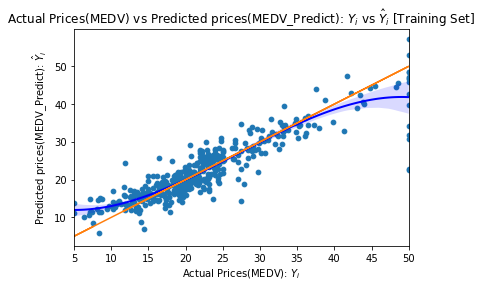

In [378]:
sns.scatterplot(y_train, y_train_predictedd, alpha=0.4)
sns.regplot(y_train, y_train_predictedd, scatter_kws={'s': 20, 'alpha':1}, line_kws={'color':'blue', 'linewidth': 2}, order=3)

plt.plot(y_train,y_train)
plt.xlabel("Actual Prices(MEDV): $Y_i$")
plt.ylabel("Predicted prices(MEDV_Predict): $\hat{Y}_i$")
plt.title("Actual Prices(MEDV) vs Predicted prices(MEDV_Predict): $Y_i$ vs $\hat{Y}_i$ [Training Set]")

 
plt.show()

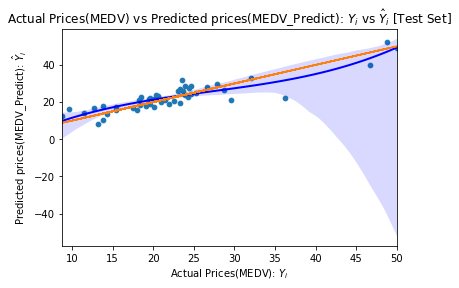

In [379]:
sns.scatterplot(y_test, y_test_predictedd, alpha=0.4)
sns.regplot(y_test, y_test_predictedd, scatter_kws={'s': 20, 'alpha':1}, line_kws={'color':'blue', 'linewidth': 2}, order=3)

plt.plot(y_test,y_test)
plt.xlabel("Actual Prices(MEDV): $Y_i$")
plt.ylabel("Predicted prices(MEDV_Predict): $\hat{Y}_i$")
plt.title("Actual Prices(MEDV) vs Predicted prices(MEDV_Predict): $Y_i$ vs $\hat{Y}_i$ [Test Set]")

plt.show()

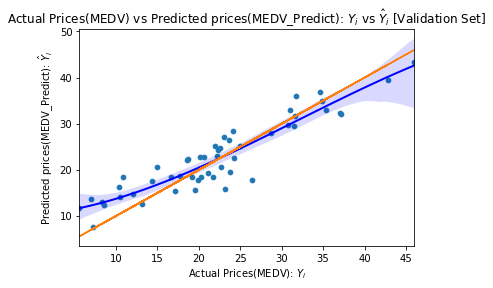

In [380]:
sns.scatterplot(y_valid, y_valid_predictedd, alpha=0.4)
sns.regplot(y_valid, y_valid_predictedd, truncate=True, scatter_kws={'s': 20, 'alpha':1}, line_kws={'color':'blue', 'linewidth': 2},order=3)


plt.plot(y_valid,y_valid)
plt.xlabel("Actual Prices(MEDV): $Y_i$")
plt.ylabel("Predicted prices(MEDV_Predict): $\hat{Y}_i$")
plt.title("Actual Prices(MEDV) vs Predicted prices(MEDV_Predict): $Y_i$ vs $\hat{Y}_i$ [Validation Set]")
 
plt.show()

In [314]:
# Root Mean Square Error for training set
mse = mean_squared_error(y_train, y_train_predictedd)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predictedd)))
 
print("The linear model performance for training set")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))

The linear model performance for training set
RMSE is 4.077975362619086
MSE is 16.629883058128264


In [315]:
# Root Mean Square Error for test set
mse = mean_squared_error(y_test, y_test_predictedd)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predictedd)))
 
print("\nThe linear model performance for testing set")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))


The linear model performance for testing set
RMSE is 3.8087316720549893
MSE is 14.506436949714793


In [316]:
# Root Mean Square Error for validation set
mse = mean_squared_error(y_valid, y_valid_predictedd)
rmse = (np.sqrt(mean_squared_error(y_valid, y_valid_predictedd)))

print("\nThe linear model performance for validation set")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))


The linear model performance for validation set
RMSE is 3.647008686502351
MSE is 13.300672359423602


# Regularization (Ridge)

In [307]:
from sklearn.linear_model import Ridge

rr1=Ridge(alpha=0.1)
rr1.fit(X_train[['RM','PTRATIO','LSTAT']], y_train)

rr2=Ridge(alpha=200)
rr2.fit(X_train[['RM','PTRATIO','LSTAT']], y_train)

print('Ridge regression test score with low alpha(0.1):',rr1.score(X_test[['RM','PTRATIO','LSTAT']],y_test))
print('Ridge regression test score with high alpha(100):',rr2.score(X_test[['RM','PTRATIO','LSTAT']],y_test)) #high alpha对score的penalty很高

Ridge regression test score with low alpha(0.1): 0.6931537770560061
Ridge regression test score with high alpha(100): 0.15050175891184336


In [375]:
#find best alpha for Ridge Regression
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':np.arange(1,10,500)} #range from 1-500 with equal interval of 10 
ridge=Ridge() 
ridge_best_alpha=GridSearchCV(ridge, param_grid)
train = ridge_best_alpha.fit(X_train[['RM','PTRATIO','LSTAT']],y_train)

print("Best alpha for Ridge Regression for train:",train.best_params_)
print("Best score for Ridge Regression with best alpha:",train.best_score_)

Best alpha for Ridge Regression for train: {'alpha': 1}
Best score for Ridge Regression with best alpha: 0.6557682529568568


In [376]:
#find best alpha for Ridge Regression
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':np.arange(1,10,500)} #range from 1-500 with equal interval of 10 
ridge=Ridge() 
ridge_best_alpha=GridSearchCV(ridge, param_grid)
train_poly = ridge_best_alpha.fit(X_train_poly,y_train)

print("Best alpha for Ridge Regression for train:",train_poly.best_params_)
print("Best score for Ridge Regression with best alpha:",train_poly.best_score_)

Best alpha for Ridge Regression for train: {'alpha': 1}
Best score for Ridge Regression with best alpha: 0.7437905022268678


In [377]:
#find best alpha for Ridge Regression
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':np.arange(1,10,500)} #range from 1-500 with equal interval of 10 
ridge=Ridge() 
ridge_best_alpha=GridSearchCV(ridge, param_grid)
train_poly_3 = ridge_best_alpha.fit(X_train_poly3,y_train)

print("Best alpha for Ridge Regression for train:",train_poly_3.best_params_)
print("Best score for Ridge Regression with best alpha:",train_poly_3.best_score_)

Best alpha for Ridge Regression for train: {'alpha': 1}
Best score for Ridge Regression with best alpha: 0.761144250977826
